<a href="https://colab.research.google.com/github/valesierrai/Aprendizaje-No-Supervisado-para-el-AD/blob/main/Extraer_Info_Documentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install googletrans==4.0.0-rc1
!pip install language-tool-python

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=961fc8afad3fdc10d9c60b13c25640f347e8b25e825ee4ad0514fcb0fb41f86c
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:


In [ ]:
from google.colab import drive # conectar con datos de drive
drive.mount('/content/drive')
from googletrans import Translator
import language_tool_python
import pandas as pd # manejo de data frame
import numpy as np # manejos matriciales
import nltk # paquete 1 de lenguaje natural
import spacy # paquete 2 de lenguaje natural
import re # paquete 2 de lenguaje natural
from textblob import TextBlob  #
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords # conjunto de stopwords
from nltk.tokenize import TweetTokenizer # tokenizador de tweet
from nltk.stem import PorterStemmer # hacer steming palabras
from nltk.stem import LancasterStemmer # hacer steming palabras
from nltk.stem import WordNetLemmatizer # extraer el lema de una palabra
import matplotlib.pyplot as plt
from transformers import pipeline
from wordcloud import WordCloud  # graficos de palabras
from transformers import MarianMTModel, MarianTokenizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

Mounted at /content/drive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
datos_x = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Aprendizaje No Supervisado/tweets_masivo.csv", encoding="latin1")
datos_bancolombia= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Aprendizaje No Supervisado/noticias.csv")


In [ ]:
#Eliminamos datos faltantes
datos_x = datos_x.dropna()

# Análisis de Sentimientos

En análisis de sentimientos, se asocia a 3 categorías: Positivo, negativo y neutral.

- TextBlob
- NLTK
- Transformer

In [ ]:
texto_prueba = datos_x["statement"].iloc[1]

## Con text blob

El análisis de sentimientos generado por esta librería, es polatity entre -1 y 1, valores negativos se asocia a que son negativos, valores positivos se asocia a que son positivos y 0 indica neutral.

Subjectivity el 1 se asocia que es un texto muy subjetivo, asociado a opiniones, sentimientos. Mientras que si se acerca a 0 es más objetivo, asociado a hechos.





In [ ]:
blob = TextBlob(texto_prueba )
(blob.sentiment)
# Polarity (-1 to 1), Subjectivity (0 to 1)
sentimiento = blob.sentiment.polarity
if sentimiento > 0:
  etiquete = "Positivo"
elif sentimiento < 0:
  etiquete = "Negativo"
else:
  etiquete = "Neutral"
print(etiquete)

Negativo


*Si el sentimiento es 0 es neutro.

In [ ]:
sentimientos = []
for elemento in datos_x["statement"]:
  blob = TextBlob(elemento)
  sentimiento = blob.sentiment.polarity
  if sentimiento > 0:
    etiquete = "Positivo"
  elif sentimiento < 0:
    etiquete = "Negativo"
  else:
    etiquete = "Neutral"
  sentimientos.append(etiquete)

In [ ]:
datos_x["sentimiento_textblob"] = sentimientos
datos_x["sentimiento_textblob"]

,sentimiento_textblob
0,Neutral
1,Negativo
2,Negativo
3,Neutral
4,Negativo
...,...
53038,Positivo
53039,Negativo
53040,Positivo
53041,Negativo


In [ ]:
#Frecuencia
datos_x["sentimiento_textblob"].value_counts()

,count
sentimiento_textblob,
Positivo,23113
Negativo,20562
Neutral,9006


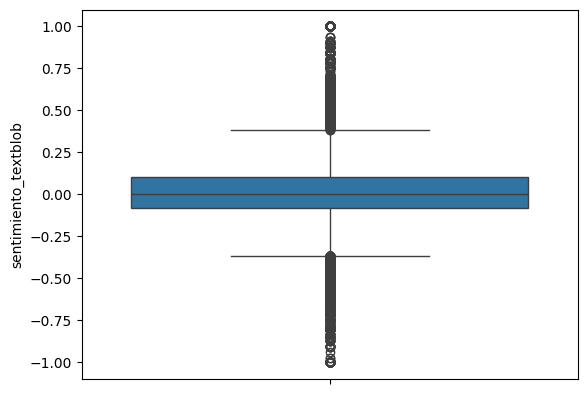

In [ ]:
#Hacemos un diagrama de cajas y bigotes
import seaborn as sns
sns.boxplot(datos_x["sentimiento_textblob"])
plt.show()

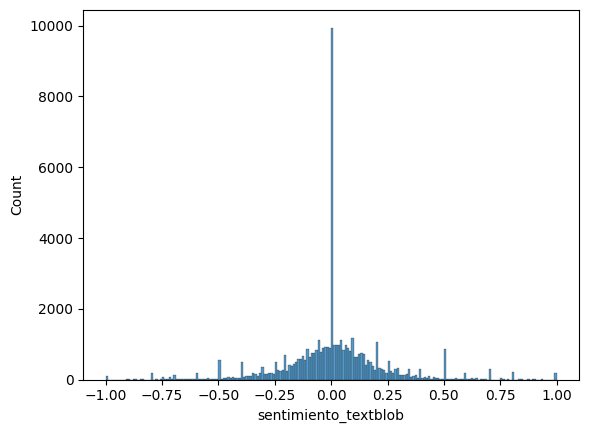

In [ ]:
#Histograma
sns.histplot(datos_x["sentimiento_textblob"])
plt.show()

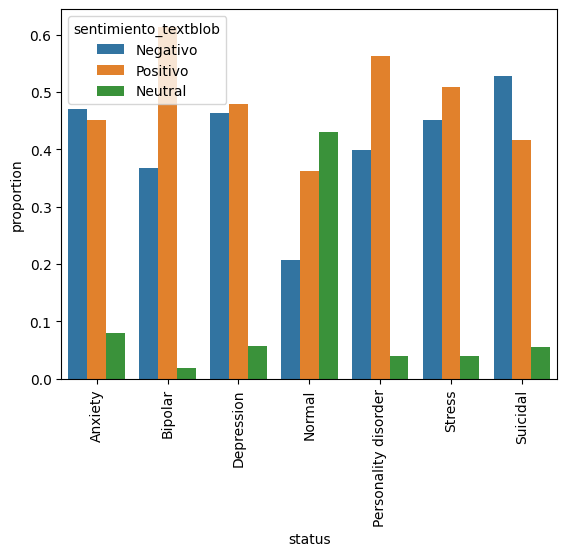

In [ ]:
tabla_frecuencia_relacion = datos_x.groupby('status')['sentimiento_textblob'].value_counts(normalize=True)
sns.barplot(data = tabla_frecuencia_relacion.reset_index(), x = 'status', y = 'proportion', hue = 'sentimiento_textblob')
plt.xticks(rotation=90)
plt.show()

## Con nltk

Arroja la probabilidad de cada categoría, por útlimo compound arroja la probabilidad

In [ ]:
sia.polarity_scores(texto_prueba)

{'neg': 0.504, 'neu': 0.496, 'pos': 0.0, 'compound': -0.7269}

In [ ]:
sia = SentimentIntensityAnalyzer()
sentimiento = (sia.polarity_scores(texto_prueba)['compound'])  # Devuelve un diccionario con los resultados
sentimiento

-0.7269

In [ ]:
sentimientos = []
for elemento in datos_x['statement']:
  nltk = sia.polarity_scores(elemento)
  sentimiento = nltk['compound']
  if sentimiento > 0:
    etiquete = "Positivo"
  elif sentimiento < 0:
    etiquete = "Negativo"
  else:
    etiquete = "Neutral"
  sentimientos.append(etiquete)

In [ ]:
datos_x["sentimiento_nltk"] = sentimientos
datos_x["sentimiento_nltk"]

,sentimiento_nltk
0,Neutral
1,Negativo
2,Negativo
3,Negativo
4,Negativo
...,...
53038,Positivo
53039,Negativo
53040,Positivo
53041,Negativo


In [ ]:
#Frecuencias
datos_x["sentimiento_nltk"].value_counts()

,count
sentimiento_nltk,
Negativo,29212
Positivo,17559
Neutral,5910


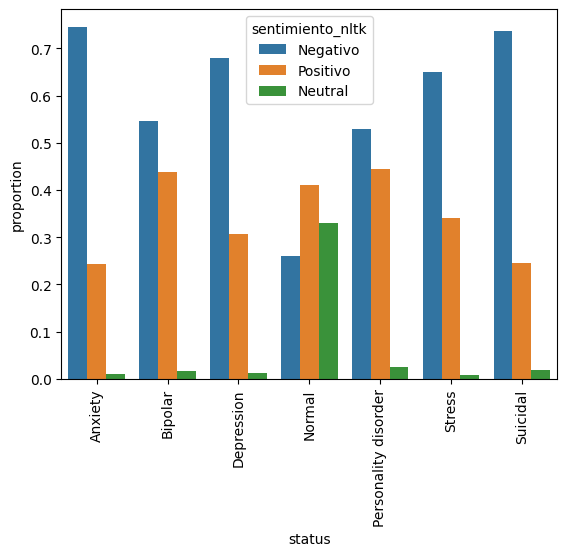

In [ ]:
tabla_frecuencia_relacion = datos_x.groupby('status')['sentimiento_nltk'].value_counts(normalize=True)
sns.barplot(data = tabla_frecuencia_relacion.reset_index(), x = 'status', y = 'proportion', hue = 'sentimiento_nltk')
plt.xticks(rotation=90)
plt.show()

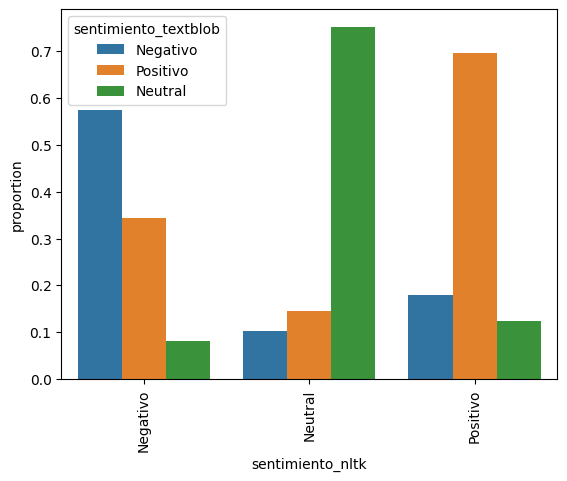

In [ ]:
#Analizo los dos algoritmos
tabla_frecuencia_relacion = datos_x.groupby('sentimiento_nltk')['sentimiento_textblob'].value_counts(normalize=True)
sns.barplot(data = tabla_frecuencia_relacion.reset_index(), x = 'sentimiento_nltk', y = 'proportion', hue = 'sentimiento_textblob')
plt.xticks(rotation=90)
plt.show()

# Con transformers

In [ ]:
classifier = pipeline('sentiment-analysis')
sentimientos = []
for elemento in datos_x['statement']:
  sentimiento = classifier(elemento)[0]['label']
  sentimientos.append(sentimiento)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (547 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The size of tensor a (547) must match the size of tensor b (512) at non-singleton dimension 1

Para todos los tweets, creemos una columna por cada método de sentimiento.

Los ciclos `for` en Python son una estructura de control que permite iterar sobre una secuencia de elementos, como listas, tuplas, diccionarios, cadenas, o cualquier otro iterable. En cada iteración, el ciclo toma un elemento de la secuencia y realiza las acciones indicadas dentro del bloque de código asociado al ciclo.

### ¿Cómo funciona un ciclo `for` en Python?

El ciclo `for` en Python se utiliza para recorrer los elementos de un iterable, como una lista o cadena. La sintaxis básica es:

```python
for elemento in secuencia:
    # Bloque de código
    # Se ejecuta una vez por cada elemento en la secuencia
```

### Componentes clave:
1. **`elemento`**: Es la variable que toma el valor de cada elemento en la secuencia en cada iteración.
2. **`secuencia`**: Es el iterable sobre el cual se está iterando. Puede ser una lista, tupla, cadena, rango, diccionario, etc.
3. **Bloque de código**: Es el conjunto de instrucciones que se ejecuta en cada iteración.



# Extracción de entidades

Cuando usas el modelo preentrenado de **spaCy** con `spacy.load("en_core_web_sm")`, puedes realizar **Reconocimiento de Entidades Nombradas (NER)**, lo que significa que el modelo identificará y clasificará ciertos tipos de entidades dentro del texto. El modelo en inglés, `en_core_web_sm`, reconoce las siguientes entidades:

### Entidades Reconocidas por `spacy.load("en_core_web_sm")`:

1. **PERSON**: Personas, figuras famosas o personajes ficticios.
   - Ejemplo: "Barack Obama", "Harry Potter".

2. **NORP**: Grupos étnicos, religiosos o políticos.
   - Ejemplo: "American", "Christian", "Communist".

3. **FAC**: Edificios, aeropuertos, carreteras, puentes, etc.
   - Ejemplo: "Eiffel Tower", "Wall Street".

4. **ORG**: Organizaciones, incluyendo compañías, agencias gubernamentales, instituciones.
   - Ejemplo: "Google", "United Nations", "NASA".

5. **GPE**: Países, ciudades o estados.
   - Ejemplo: "France", "New York", "California".

6. **LOC**: Lugares no geopolíticos (montañas, ríos, regiones).
   - Ejemplo: "Mount Everest", "Sahara Desert".

7. **PRODUCT**: Productos o bienes tangibles (objetos físicos).
   - Ejemplo: "iPhone", "Ford Mustang".

8. **EVENT**: Eventos nombrados, incluyendo guerras, concursos deportivos, desastres, etc.
   - Ejemplo: "World War II", "Super Bowl", "Olympics".

9. **WORK_OF_ART**: Títulos de obras de arte, libros, canciones, películas, etc.
   - Ejemplo: "The Mona Lisa", "Inception", "Bohemian Rhapsody".

10. **LAW**: Documentos legales nombrados.
   - Ejemplo: "Constitution", "The Magna Carta".

11. **LANGUAGE**: Idiomas.
   - Ejemplo: "English", "Spanish", "Mandarin".

12. **DATE**: Fechas, períodos de tiempo o cualquier expresión de tiempo.
   - Ejemplo: "June 25, 2023", "next Monday", "two weeks".

13. **TIME**: Tiempos dentro del día.
   - Ejemplo: "2:30 PM", "midnight", "morning".

14. **PERCENT**: Porcentajes.
   - Ejemplo: "50%", "20 percent".

15. **MONEY**: Cantidades monetarias.
   - Ejemplo: "$100", "500 euros", "10 dollars".

16. **QUANTITY**: Cantidades de unidades.
   - Ejemplo: "10 kilograms", "5 liters", "several meters".

17. **ORDINAL**: Números ordinales.
   - Ejemplo: "first", "second", "third".

18. **CARDINAL**: Números cardinales que no caen bajo otra categoría.
   - Ejemplo: "one", "two", "100".




In [ ]:
texto_prueba2 = datos_bancolombia["news_text_content"].iloc[0]

In [ ]:
datos_bancolombia_temporal = datos_bancolombia.iloc[0:100,:]

In [ ]:
datos_bancolombia_temporal['news_title']

# Traducción

Para no tener problemas con los modelos adaptados para el idioma inglés, podemos hacer una traducción de todos los textos.

In [ ]:
translator = Translator()
translated = translator.translate(texto_prueba2, dest='en')
texto_prueba2_en = translated.text

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(texto_prueba2_en)
for ent in doc.ents:
    print(ent.text, ent.label_)

This Tuesday DATE
August 2 DATE
4,328 MONEY
4,245.In MONEY
US GPE
$ 889.35 million MONEY
1,650 CARDINAL
68.55 MONEY
today DATE
4,314.54.TRM MONEY
today DATE
Friday, July 22 DATE
five CARDINAL
today DATE


Obtengamos la frecuencia de las entidades sobre personas famosas o entidades.

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(texto_prueba2)
for ent in doc.ents:
    print(ent.text, ent.label_)

2 CARDINAL
el dolar ORG
un ORG
4.328 MONEY
un ORG
4.245 MONEY
Ademas ORG
889,35 MONEY
1.650 CARDINAL
Un PRODUCT
cambio PERSON
subia de $ ORG
68,55 MONEY
Tasa Representativa PERSON
del Mercado PERSON
4.314,54 MONEY
siga la cotizacion del dolar ORG
22 CARDINAL
Le WORK_OF_ART
Cinco PERSON
para hacerle PERSON
al precio del dolar ORG
El Mundo Hoy ORG


Etiquetas comunes usadas en los modelos NER de Transformers:

- PER: Persona.
- LOC: Lugar (geográfico).
- ORG: Organización.
- MISC: Misceláneo, que incluye títulos, eventos, etc.

In [ ]:
traduccion = []
for elemento in datos_bancolombia_temporal['news_title']:
  translator = Translator()
  translated = translator.translate(elemento, dest='en')
  texto_en = translated.text
  traduccion.append(texto_en)
datos_bancolombia_temporal['news_title_en']=traduccion

<ipython-input-64-9b4ddc17091b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_bancolombia_temporal['news_title_en']=traduccion


In [ ]:
entidades = []
for elemento in datos_bancolombia_temporal['news_title_en']:
  nlp = spacy.load("en_core_web_sm")
  doc = nlp(elemento)
  for ent in doc.ents:
    if ent.label_ == "ORG" or ent.label_ == "GPE":
      entidades.append(ent.text)

In [ ]:
pd.Series(entidades).value_counts()

,count
Colombia,12
BBVA,7
the United States,6
Bancolombia,4
Argentina,3
...,...
Ukraine,1
EA Sports,1
Proparco,1
National Development Financial's,1


In [ ]:
ner_pipeline = pipeline("ner", grouped_entities=True)

# Realizar el reconocimiento de entidades
entities = ner_pipeline(texto_prueba2)

# Mostrar las entidades detectadas
for entity in entities:
    print(f"Entity: {entity['word']}, Label: {entity['entity_group']}, Score: {entity['score']:.2f}")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:168: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


Entity: Ad, Label: PER, Score: 0.50
Entity: US, Label: MISC, Score: 1.00
Entity: Ta, Label: MISC, Score: 0.69
Entity: Me, Label: MISC, Score: 0.57
Entity: ##do, Label: MISC, Score: 0.67
Entity: El Mundo Hoy, Label: ORG, Score: 0.97


# Corrección ortografíca

TextBlob



In [ ]:
blob = TextBlob(texto_prueba2 )
print(texto_prueba2)
print(blob.correct())

Este martes, 2 de agosto, el dolar alcanzo un precio maximo de $4.328 y un minimo de $4.245. Ademas, se negociaron US$889,35 millones en 1.650 transacciones. Un cambio en la divisa que representa una subia de $68,55 frente a la Tasa Representativa del Mercado (TRM hoy), que es de $4.314,54. TRM hoy: siga la cotizacion del dolar, en vivo, hoy viernes 22 de julio Le puede interesar: Cinco recomendaciones para hacerle el quite al precio del dolar y a la inflacion Escuche el podcast El Mundo Hoy 
She mates, 2 de costo, el dollar alcanzo un precious maxim de $4.328 y un minims de $4.245. Ideas, se negociaron of$889,35 millions en 1.650 transactions. In cabin en la divine que represent un tibia de $68,55 french a la Vasa Representative del Mercado (TRM hoy), que es de $4.314,54. TRM hoy: sign la cotizacion del dollar, en vive, hoy verses 22 de julie He piece interest: Into recomendaciones para hacerle el quite al precious del dollar y a la inflation Escuche el podcast Ll Undo Boy 


In [ ]:
# Cargar el corrector para español
tool_es = language_tool_python.LanguageTool('es') # en español
tool_en = language_tool_python.LanguageTool('en') # en inglés

INFO:language_tool_python.download_lt:Unzipping /tmp/tmpdwqm8o0n.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-6.4.zip to /root/.cache/language_tool_python.


In [ ]:
matches = tool_es.check(texto_prueba2)

corrected_text = language_tool_python.utils.correct(texto_prueba2, matches)
print("Texto corregido:", corrected_text)

Texto corregido: Este viernes, 2 de agosto, el dólar alcanzo un precio máximo de $4.328 y un mínimo de $4.245. Además, se negociaron US$889,35 millones en 1.650 transacciones. Un cambio en la divisa que representa una subía de $68,55 frente a la Tasa Representativa del Mercado (TRM hoy), que es de $4.314,54. TRM hoy: siga la cotización del dólar, en vivo, hoy lunes 22 de julio Le puede interesar: Cinco recomendaciones para hacerle el quite al precio del dólar y a la inflación Escuche el pódcast El Mundo Hoy 


Qué pasa si obtenemos las palabras más frecuentes en todos los tweets, aplicando correción ortográfica.  

# Resumen de texto

In [ ]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:

summary = summarizer(texto_prueba2_en, do_sample=True)


Your max_length is set to 142, but your input_length is only 126. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=63)


In [ ]:
print(texto_prueba2_en)
print(summary[0]["summary_text"])

This Tuesday, August 2, the dollar reached a maximum price of $ 4,328 and a minimum of $ 4,245.In addition, US $ 889.35 million were negotiated in 1,650 transactions.A change in the currency that represents a subia of $ 68.55 compared to the representative rate of the market (TRM today), which is $ 4,314.54.TRM TODAY: Follow the price of the dollar, live, today Friday, July 22, you may be interested: five recommendations to take off at the price of dollar and inflation listen to the podcast the world today
This Tuesday, August 2, the dollar reached a maximum price of $ 4,328. In addition, US $ 889.35 million were negotiated in 1,650 transactions. A change in the currency that represents a subia of $ 68.55 compared to the representative rate of the market (TRM today), which is 4,314.54.


¿Qué pasa si aplicamos el resumen a todas las noticias?